In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv(r'C:\Users\jota_\Repositorios\customer_segmentation\Mall_customers.csv')


In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data = df.iloc[:, [3,4]].values

In [10]:

data


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [11]:
wcss = []

In [13]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\jota_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jota_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jota_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

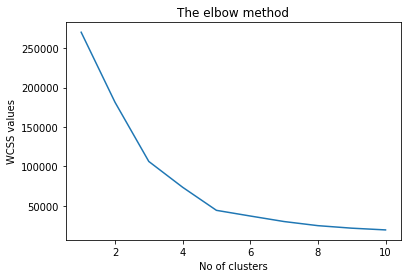

In [14]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS values')
plt.show()

In [15]:
kmeans_model = KMeans(n_clusters = 5, init='k-means++', random_state=0)

In [17]:
table = kmeans_model.fit_predict(data)

C:\Users\jota_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


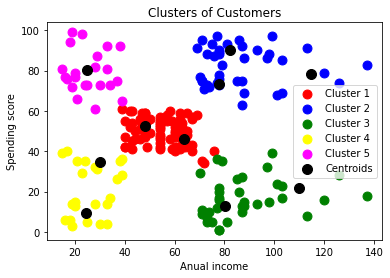

In [18]:
plt.scatter(data[table == 0,0], data[table == 0,1], s=80, c="red", label='Cluster 1')
plt.scatter(data[table == 1,0], data[table == 1,1], s=80, c="blue", label='Cluster 2')
plt.scatter(data[table == 2,0], data[table == 2,1], s=80, c="green", label='Cluster 3')
plt.scatter(data[table == 3,0], data[table == 3,1], s=80, c="yellow", label='Cluster 4')
plt.scatter(data[table == 4,0], data[table == 4,1], s=80, c="magenta", label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c='black', label= 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Anual income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

In [19]:
table = pd.DataFrame(table)

id = list(range(1, 201))

In [20]:
table['CustomerID'] = id

In [21]:
new = pd.merge(df, table, how='inner', on=['CustomerID'])

In [22]:
new.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score', 'ClusterID']

cluster_dict = {0:'Average', 1:'Treasure', 2:'Low Interest', 3:'Occasional', 4:'Loyal'}

new['Cluster Name'] = new['ClusterID']

In [23]:
new['Cluster Name'].replace(cluster_dict, inplace=True)

In [24]:
new.sample(30)

,CustomerID,Gender,Age,Annual Income,Spending Score,ClusterID,Cluster Name
69,70,Female,32,48,47,0,Average
107,108,Male,54,63,46,0,Average
190,191,Female,34,103,23,2,Low Interest
38,39,Female,36,37,26,3,Occasional
21,22,Male,25,24,73,4,Loyal
132,133,Female,25,72,34,0,Average
129,130,Male,38,71,75,1,Treasure
70,71,Male,70,49,55,0,Average
120,121,Male,27,67,56,0,Average
169,170,Male,32,87,63,1,Treasure
